In [65]:
#from pysr import PySRRegressor, TemplateExpressionSpec

import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'stixgeneral'
import numpy as np

import camb

In [66]:
lm = 5000

In [67]:
def get_lensing_camb(omb, omc):
    pars = camb.set_params(H0 = 67.4, ombh2 = omb, omch2 = omc, lmax=lm)
    results = camb.get_results(pars)
    powers = results.get_cmb_power_spectra(pars, CMB_unit='muK')
    lensed = powers['total'][2:lm, 0]
    unlensed = powers['unlensed_total'][2:lm, 0]
    return lensed/unlensed

In [68]:
ombs = [0.022, 0.022, 0.022, 0.022, 0.022, 0.022, 0.022, 0.022, 0.022]
omcs = [0.04,0.07, 0.1, 0.12, 0.15, 0.18, 0.19, 0.21, 0.23]

ombs = [0.005, 0.01, 0.022, 0.03, 0.04]
omcs = [0.12,0.12, 0.12, 0.12,0.12]

#ombs = [0.02, 0.022, 0.022]
#omcs = [0.1, 0.1, 0.12]

ells = np.array([l for l in range(2, lm)])

n = len(omcs)
lensings_camb = [get_lensing_camb(ombs[i], omcs[i]) for i in range(n)]

label_key = ["$\\Omega_bh^2$ = " + str(ombs[i]) + ", $\\Omega_ch^2$ = " + str(omcs[i]) for i in range(n)]

fid_ombh2 = 0.0224
fid_omch2 = 0.12

In [69]:
fid_ombh2 + fid_omch2

0.1424

In [70]:
-0.2933971266963615 * 0.95631305

-0.28057950109223384

In [71]:
def og_fit(ell, ombh2, omch2):
    
    x2 = (ombh2 + omch2)
    x1 = ombh2

    beta_1 = 0.83
    beta_2 = 3218
    beta_3 = 3240
    beta_4 = 100

    alpha = x2 * x1 **-0.877 - 3.342 * x2 - 1.118

    sigm = (1 + np.exp(-(ell-beta_3)/beta_4))**(-1)

    poly = (beta_1*(ell/beta_2)**alpha - 1)
    
    L = poly*sigm + 1
    
    return L

In [116]:
def lensing_tail_fit(ell, ombh2, omch2):
    x2 = (ombh2 + omch2)/(fid_omch2 + fid_ombh2) - 1
    x1 = ombh2/fid_ombh2 -1
        
    beta_1 = 0.6838 * (1 + -0.14316  * x2  + 0.21621 * x2**2 + 0.41445233 * x1 + 0.6839582  * x1**2) 
    beta_2 = 2803.1562 * (1 + -0.1925  * x2 + 0.33984  * x2**2 + 0.29293775 * x1 + 0.34369355 * x1 **2) 
    
    beta_3 = 3752.098 * (1 + -0.49117 * x2 + 0.3637 * x2**2 + 0.367123   * x1 +-0.24356314 * x1**2) 
    beta_4 = 407.009 * (1 + -0.879 * x2 + -0.3132 *x2**2 + 1.03548909 * x1 +0.92004413  * x1**2) 
    alpha = 2.5867 *(1 + 0.7702 * x2 + 0.3882 * x2 **2 + -1.24911319 * x1 + 0.31947102  * x1**2)
        
    sigm = (1 + np.exp(-(ell-beta_3)/beta_4))**(-1)

    poly = (beta_1*(ell/beta_2)**alpha - 1)
    
    L = poly*sigm + 1
    
    return L

In [117]:
lensings_fit = [lensing_tail_fit(ells, ombs[i], omcs[i]) for i in range(n)]

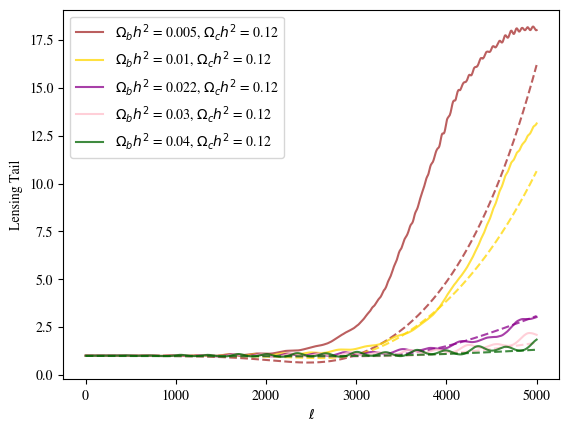

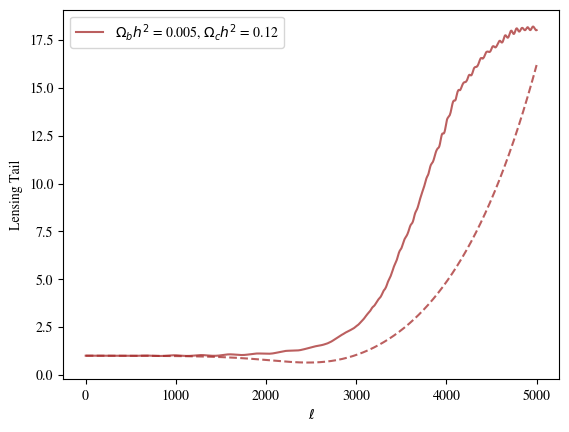

In [118]:
color_key = ["brown","gold","darkmagenta", "pink", "darkgreen", "aqua", "slateblue", "palegreen", "crimson", "blue", "lime"]
for i in range(n):
    plt.plot(ells, lensings_fit[i], color = color_key[i], linestyle = "dashed", alpha = 0.75)
    plt.plot(ells, lensings_camb[i], color = color_key[i], label = label_key[i], alpha = 0.75)
plt.xlabel("$\\ell$")
plt.ylabel("Lensing Tail")
#plt.ylim(0.9,3)
plt.legend()
plt.show()
for i in [0]: 
    plt.plot(ells, lensings_fit[i], color = color_key[i], linestyle = "dashed", alpha = 0.75)
    plt.plot(ells, lensings_camb[i], color = color_key[i], label = label_key[i], alpha = 0.75)
plt.legend()
plt.xlabel("$\\ell$")
plt.ylabel("Lensing Tail")
plt.show()